<a href="https://colab.research.google.com/github/Poorvaahuja/clusteringKMeans/blob/main/kMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

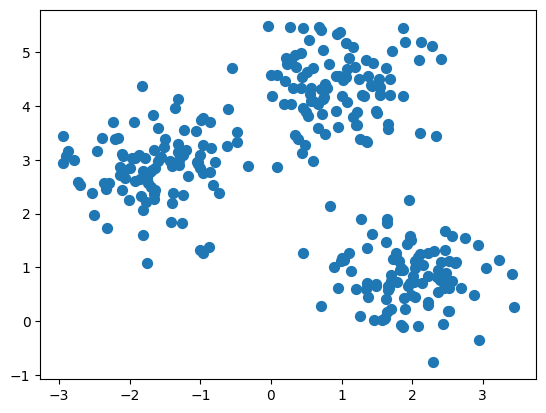

In [3]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [4]:
def k_means(X, k, max_iters=100):
  np.random.seed(42)
  centroids = X[np. random.choice(X.shape[0], k, replace=False)]
  for _ in range(max_iters):
    distances = np.sqrt(((X- centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
    if np.all(centroids == new_centroids):
      break
    centroids = new_centroids
  return centroids, clusters

In [6]:
def k_means_plus_plus(X, k):
  np.random.seed(42)
  centroids = [X[np.random.randint(len(X))]]

  for _ in range(1, k):
      distances = np.min([np.sum((X - c) ** 2, axis=1) for c in centroids], axis=0)
      probs = distances / distances.sum()
      cumulative_probs = np.cumsum(probs)
      r = np.random.rand()

      for j, p in enumerate(cumulative_probs):
          if r < p:
              centroids.append(X[j])
              break

  return np.array(centroids)

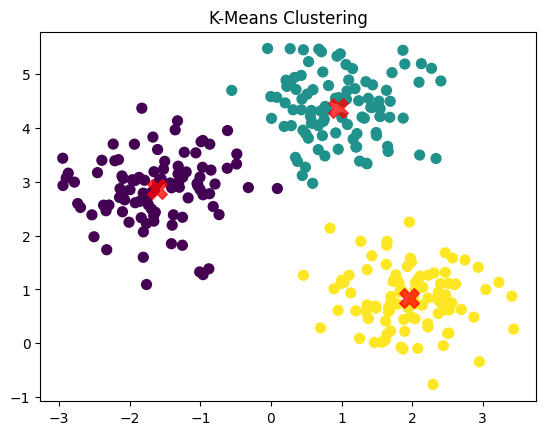

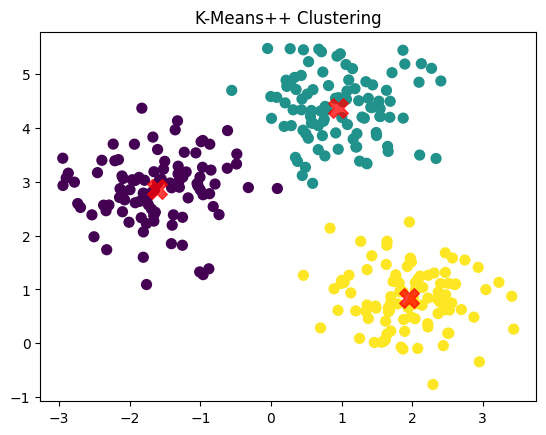

In [7]:
# Set parameters
k = 3

# K-Means with random initialization
centroids, clusters = k_means(X, k)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.show()

# K-Means with K-Means++ initialization
centroids = k_means_plus_plus(X, k)
centroids, clusters = k_means(X, k)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means++ Clustering')
plt.show()
